In [1]:
#Importando librerías 
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 

%matplotlib inline 
plt.style.use('ggplot')

pd.set_option('display.max_columns', 100)

# 2. Cargar dataset

In [2]:
#LEER DATASET 
data = pd.read_csv(f'../data/Most Streamed Spotify Songs 2024.csv', encoding ='latin-1')
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

# 3. Identificar datos nulos o vacíos

In [4]:
#LIMPIEZA DE DATOS FALTANTES
missing_values = pd.DataFrame(data.isna().sum().sort_values(ascending = False)).reset_index().rename(columns = {'index':'Track' , 0:'missing_values'})
missing_values = missing_values.loc[missing_values['missing_values'] > 0]
missing_values

,Track,missing_values
0,TIDAL Popularity,4600
1,Soundcloud Streams,3333
2,SiriusXM Spins,2123
3,Pandora Track Stations,1268
4,TikTok Posts,1173
5,Pandora Streams,1106
6,Amazon Playlist Count,1055
7,YouTube Playlist Reach,1009
8,TikTok Views,981
9,TikTok Likes,980


# 4. Eliminar Columnas innecesarias

In [5]:
data.drop(['TIDAL Popularity','ISRC','All Time Rank','AirPlay Spins','SiriusXM Spins','Amazon Playlist Count','Pandora Streams',
           'Pandora Track Stations','Soundcloud Streams','Shazam Counts', 'Apple Music Playlist Count',  'Deezer Playlist Count', 'Deezer Playlist Reach'  ],axis=1,inplace=True)

data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Explicit Track'],
      dtype='object')

# 4.5 Seguir Trabjando con datos nulos o vacios

In [6]:
data.dropna(thresh=len(data.columns) - 5, inplace=True)
data.fillna(0,inplace=True)

In [7]:
#Editar tipo de dato (especificamente aquellos que son tipo object que tienen gran cantidad de numeros a float)
def the_formula(data, columns): 
      for col in columns: 
                if data[col].dtype == object: 
                        data[col] = data[col].str.replace(',', '').apply(pd.to_numeric, errors = 'coerce')
      return data 

In [8]:
converted_columns = ['TikTok Posts', 'YouTube Playlist Reach', 'TikTok Views', 'TikTok Likes','YouTube Likes', 'YouTube Views', 'Spotify Streams', 'Spotify Playlist Reach', 'Spotify Playlist Count']
data = the_formula(data, converted_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4335 non-null   object 
 1   Album Name              4335 non-null   object 
 2   Artist                  4335 non-null   object 
 3   Release Date            4335 non-null   object 
 4   Track Score             4335 non-null   float64
 5   Spotify Streams         4292 non-null   float64
 6   Spotify Playlist Count  4334 non-null   float64
 7   Spotify Playlist Reach  4334 non-null   float64
 8   Spotify Popularity      4335 non-null   float64
 9   YouTube Views           4249 non-null   float64
 10  YouTube Likes           4243 non-null   float64
 11  TikTok Posts            3425 non-null   float64
 12  TikTok Likes            3617 non-null   float64
 13  TikTok Views            3616 non-null   float64
 14  YouTube Playlist Reach  3578 non-null   float

In [9]:
#Llenar los valores numericos vacíos 
for col in data.columns: 
    if data[col].dtype != object: 
        data[col].fillna(0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6900\2968426593.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)


In [10]:
#Cambiar el tipo de datos
for col in data.columns: 
      if data[col].dtype == float: 
         data[col] = data[col].astype(int)

In [11]:
#Validar nuevamente los datos nulos
data.isnull().sum()

Track                     0
Album Name                0
Artist                    0
Release Date              0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
TikTok Posts              0
TikTok Likes              0
TikTok Views              0
YouTube Playlist Reach    0
Explicit Track            0
dtype: int64

# 5. Validar Duplicados 

In [12]:
#Identificar datos duplicados 
duplicated_rows = pd.DataFrame(data.duplicated()).rename(columns= {0:'duplicated_rows'})
duplicated_rows[duplicated_rows['duplicated_rows'] == True]

,duplicated_rows
2450,True
3450,True


In [13]:
#Despues de identificar los datos duplicados procedo a eliminarlos 
data.drop_duplicates(keep='first', inplace= True)
data.duplicated().sum()

0

# 6. Cambiar tipo de dato (booleanos)

In [14]:
data.loc[data['Explicit Track'] == 1, 'Explicit Track'] = 'True'
data.loc[data['Explicit Track'] == 0, 'Explicit Track'] = 'False'
data['Release Date']=pd.to_datetime(data['Release Date'])
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6900\1132247115.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Explicit Track'] == 1, 'Explicit Track'] = 'True'


,Track,Album Name,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,-2147483648,150597040,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,-2147483648,373784955,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,-2147483648,-2147483648,False
4,Houdini,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,True


In [15]:
#Convertir cualquier valor negativo en absoluto 
for col in data.columns: 
    if np.issubdtype(data[col].dtype, np.number): 
        data[col] = data[col].apply(lambda x: abs(x) if x < 0 else x)
data.head()

,Track,Album Name,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,2147483648,150597040,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,2147483648,2147483648,False
4,Houdini,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,True


# 7. Insertar valores necesarios para el EDA en nuevas columnas

In [16]:
data.insert(4,'year',data['Release Date'].dt.year)
data.insert(5,'month',data['Release Date'].dt.month_name())
data['Total_streams'] = data['Spotify Streams'] + data['YouTube Views'] + data['TikTok Views']
data.head()

,Track,Album Name,Artist,Release Date,year,month,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track,Total_streams
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,2024,April,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,2147483648,150597040,False,2622229338
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2024,May,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,True,648389949
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,2024,March,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,2147483648,373784955,False,2871392047
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,2023,January,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,2147483648,2147483648,False,5274865180
4,Houdini,Houdini,Eminem,2024-05-31,2024,May,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,True,184408879


In [17]:
data.describe(include=object)

,Track,Album Name,Artist,month,Explicit Track
count,4333,4333,4333,4333,4333
unique,4187,3801,1884,12,2
top,ýýýýýýýýýýýý,Un Verano Sin Ti,Drake,January,False
freq,7,20,61,488,2755


# 8. Visualizaciones

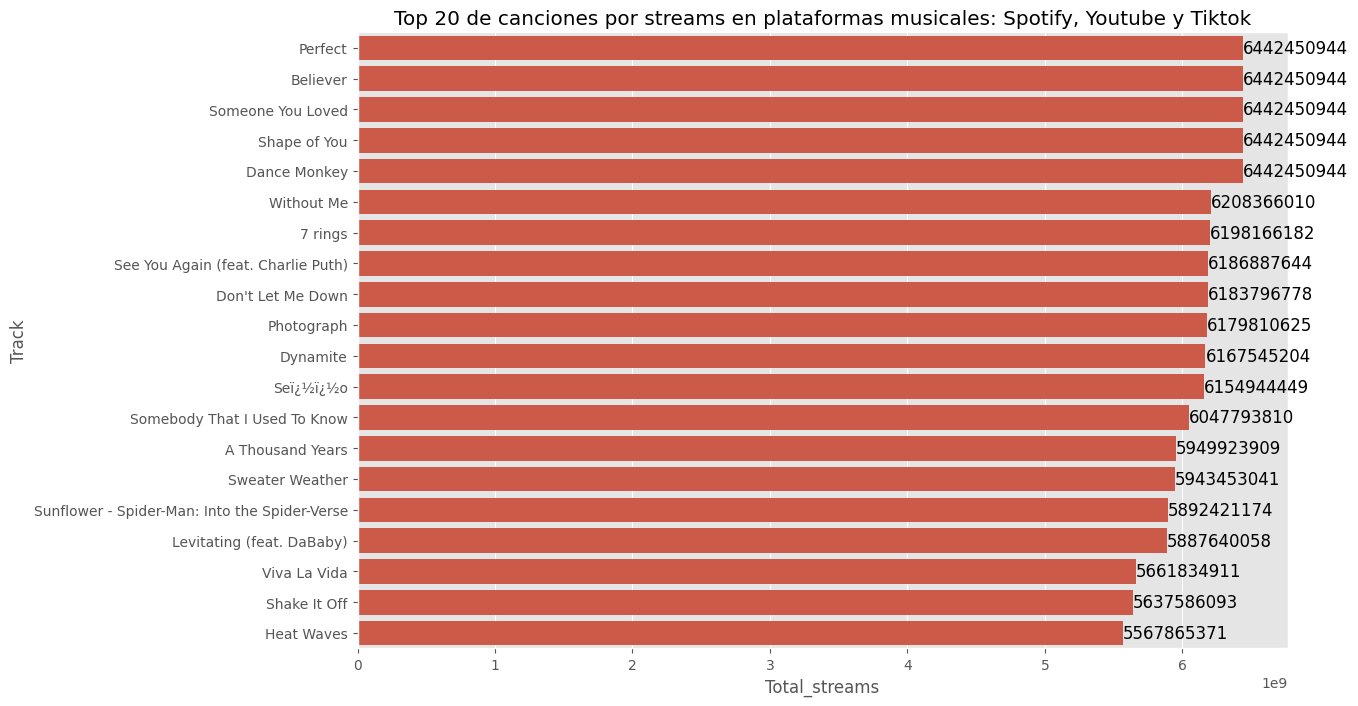

In [18]:
#Visualizacion 1
import matplotlib.pyplot as plt
import seaborn as sns
Track_Total_Streams = data.sort_values(by='Total_streams', ascending=False).head(20)

#Generar visualizacion 
plt.figure(figsize=(12,8))
sns.barplot(x='Total_streams', y='Track', data=Track_Total_Streams, dodge=False)
plt.xlabel('Total_streams')
plt.ylabel('Track')
plt.title('Top 20 de canciones por streams en plataformas musicales: Spotify, Youtube y Tiktok')

for index, value in enumerate(Track_Total_Streams['Total_streams']): 
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

plt.show()

Las canciones Perfect, Believer, Someone You Loved, Shape of U y Dance Monkey son las canciones con más streams en las distintas plataformas.

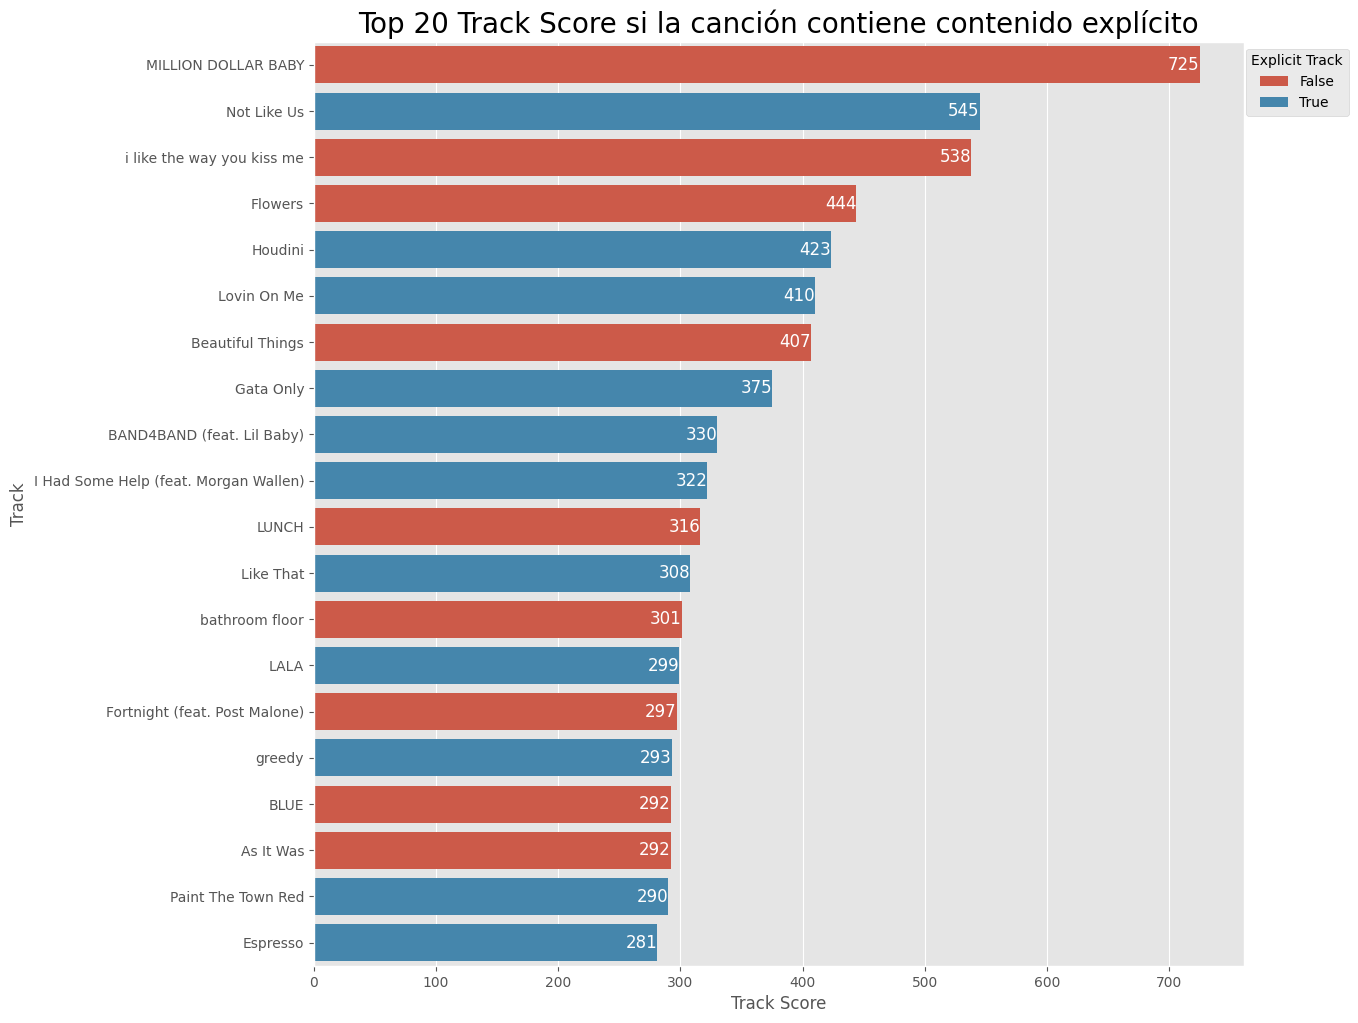

In [19]:
Track_Score = data.sort_values(by='Track Score', ascending=False).head(20)

plt.figure(figsize=(12, 12))
sns.barplot(x='Track Score', y='Track', data=Track_Score, hue='Explicit Track', dodge=False)
plt.xlabel('Track Score')
plt.ylabel('Track')
plt.title('Top 20 Track Score si la canción contiene contenido explícito', fontsize=20)
plt.legend(title='Explicit Track', loc='upper right', bbox_to_anchor=(1.12, 1))

for index, value in enumerate(Track_Score['Track Score']):
    plt.text(value, index, f'{value}', va='center', ha='right', fontsize=12, color='white')

plt.show()

1. La canción con mejor puntación es MILLION DOLLAR BABY
2. La mayoría de canciones con mejores puntuaciones contienen letras explicitas. 

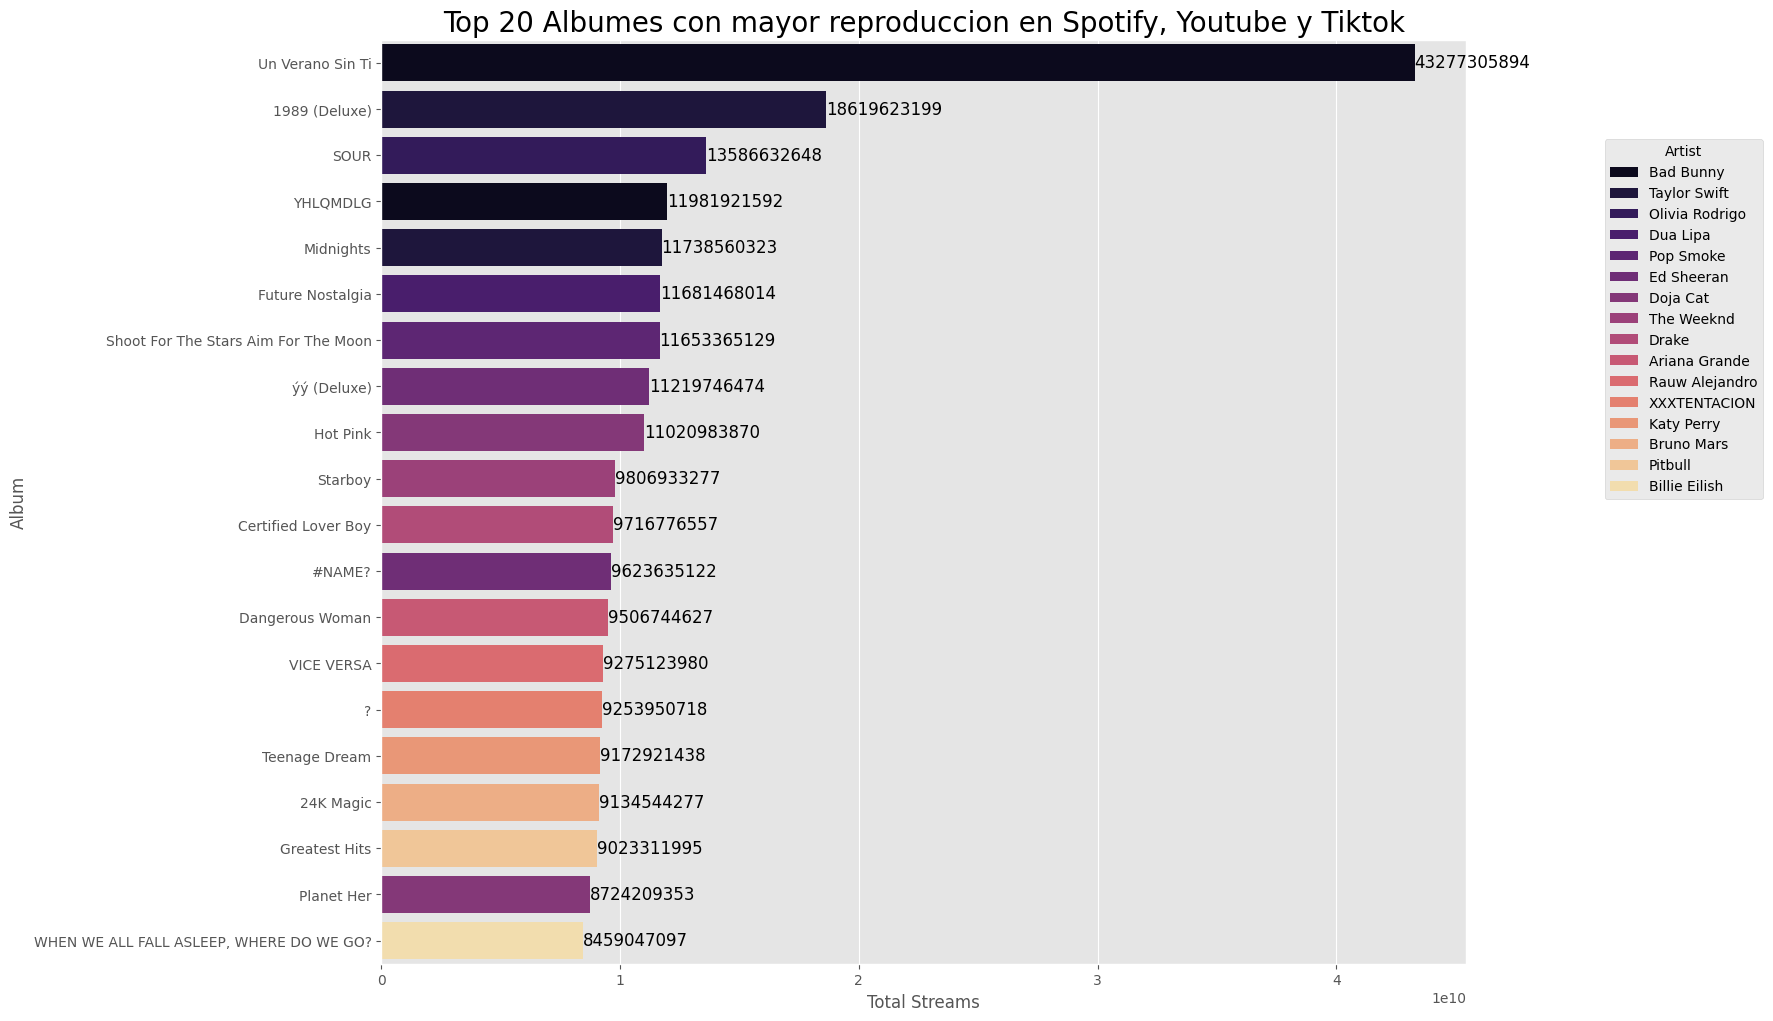

In [20]:
Album_Streams = data.groupby(['Album Name', 'Artist'], as_index=False)['Total_streams'].sum()
Album_Streams =Album_Streams.sort_values('Total_streams', ascending=False).head(20)

plt.figure(figsize=(14,12))
sns.barplot(x='Total_streams', y='Album Name', data=Album_Streams, hue='Artist', dodge=False, palette='magma')
plt.xlabel('Total Streams')
plt.ylabel('Album')
plt.title('Top 20 Albumes con mayor reproduccion en Spotify, Youtube y Tiktok', fontsize= 20)
plt.legend(title='Artist', loc='upper right', bbox_to_anchor=(1.28,0.9))

for index, value in enumerate(Album_Streams['Total_streams']): 
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

plt.show()

1. El album con más reproducciones es un Verano sin ti de Bad Bunny

C:\Users\DELL\AppData\Local\Temp\ipykernel_6900\3017433376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Total_streams', data=Artist_Streams, palette='magma')


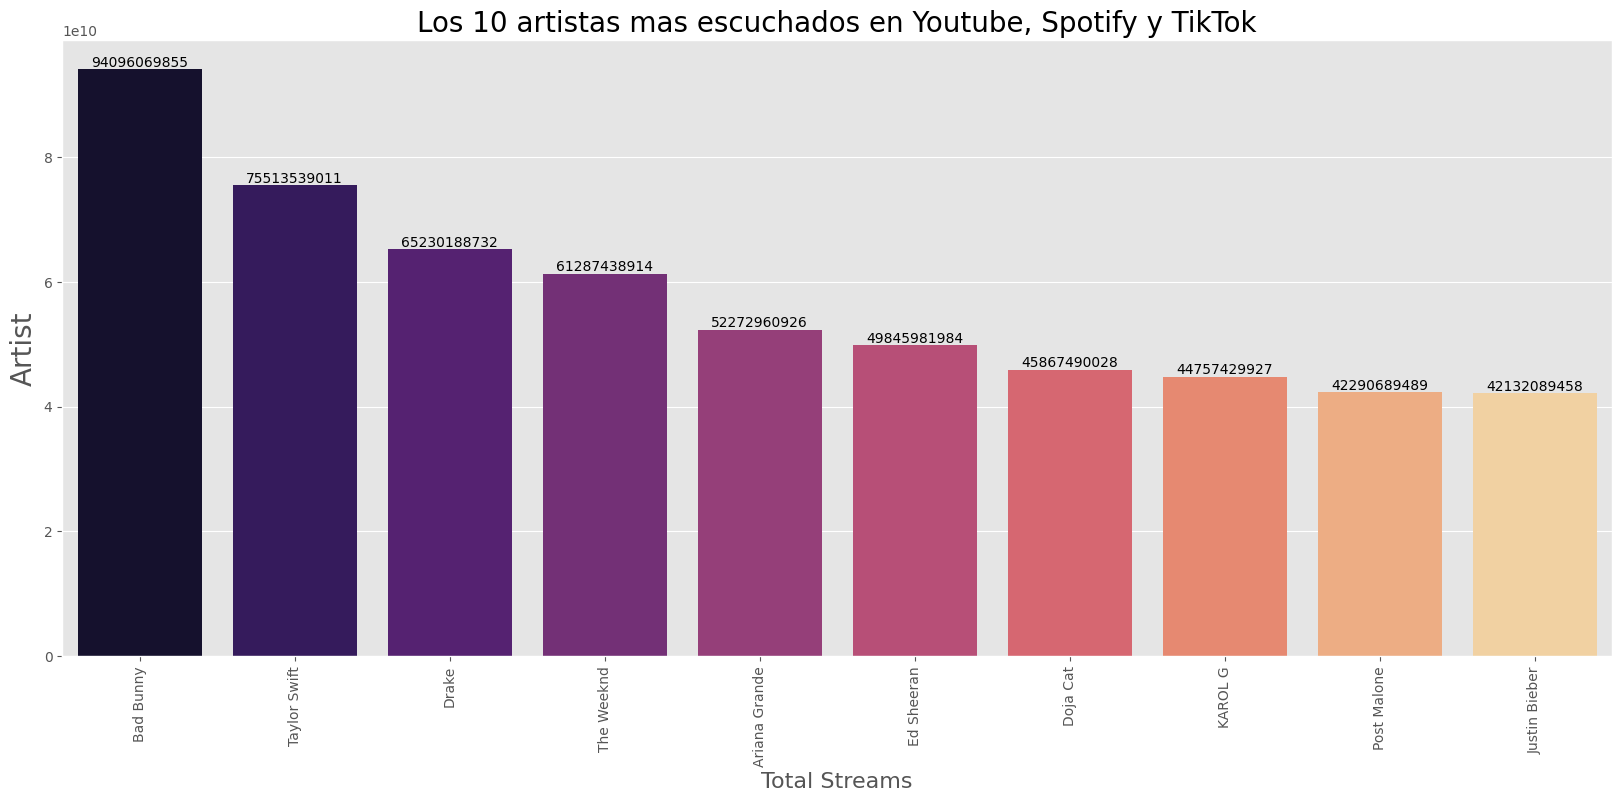

In [21]:
Artist_Streams = data.groupby('Artist', as_index=False).agg({'Spotify Streams':'sum','YouTube Views':'sum','TikTok Views':'sum','Total_streams':'sum','Track Score':'mean'})
Artist_Streams = Artist_Streams.sort_values(by='Total_streams', ascending=False).head(10)

fig,ax = plt.subplots(figsize=(20,8))

sns.barplot(x='Artist', y='Total_streams', data=Artist_Streams, palette='magma')
plt.xlabel('Total Streams',fontsize=16)
plt.ylabel('Artist',fontsize=20)
plt.title('Los 10 artistas mas escuchados en Youtube, Spotify y TikTok', fontsize=20)
plt.xticks(rotation=90)

for index, value in enumerate(Artist_Streams['Total_streams']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')


El arista más escuchado es Bad Bunny, seguido de Taylor Swift y Drake

In [22]:
specific_artists = ['Drake','Taylor Swift','Bad Bunny','The Weeknd','Ariana Grande','Ed Sheeran','Doja Cat','KAROL G','Post Malone','Justin Bieber']

filtered_data = data[data['Artist'].isin(specific_artists)]

Artist_track_count = pd.DataFrame(filtered_data['Artist'].value_counts()).reset_index().rename(columns = {'Artist':'Artist',0:'Count'})

Artist_track_count

,Artist,count
0,Drake,61
1,Taylor Swift,60
2,Bad Bunny,59
3,KAROL G,32
4,The Weeknd,28
5,Ariana Grande,25
6,Post Malone,21
7,Doja Cat,17
8,Ed Sheeran,15
9,Justin Bieber,14


C:\Users\DELL\AppData\Local\Temp\ipykernel_6900\304965120.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Artist', data=Artist_track_count,ax=ax[2,0],palette='magma')


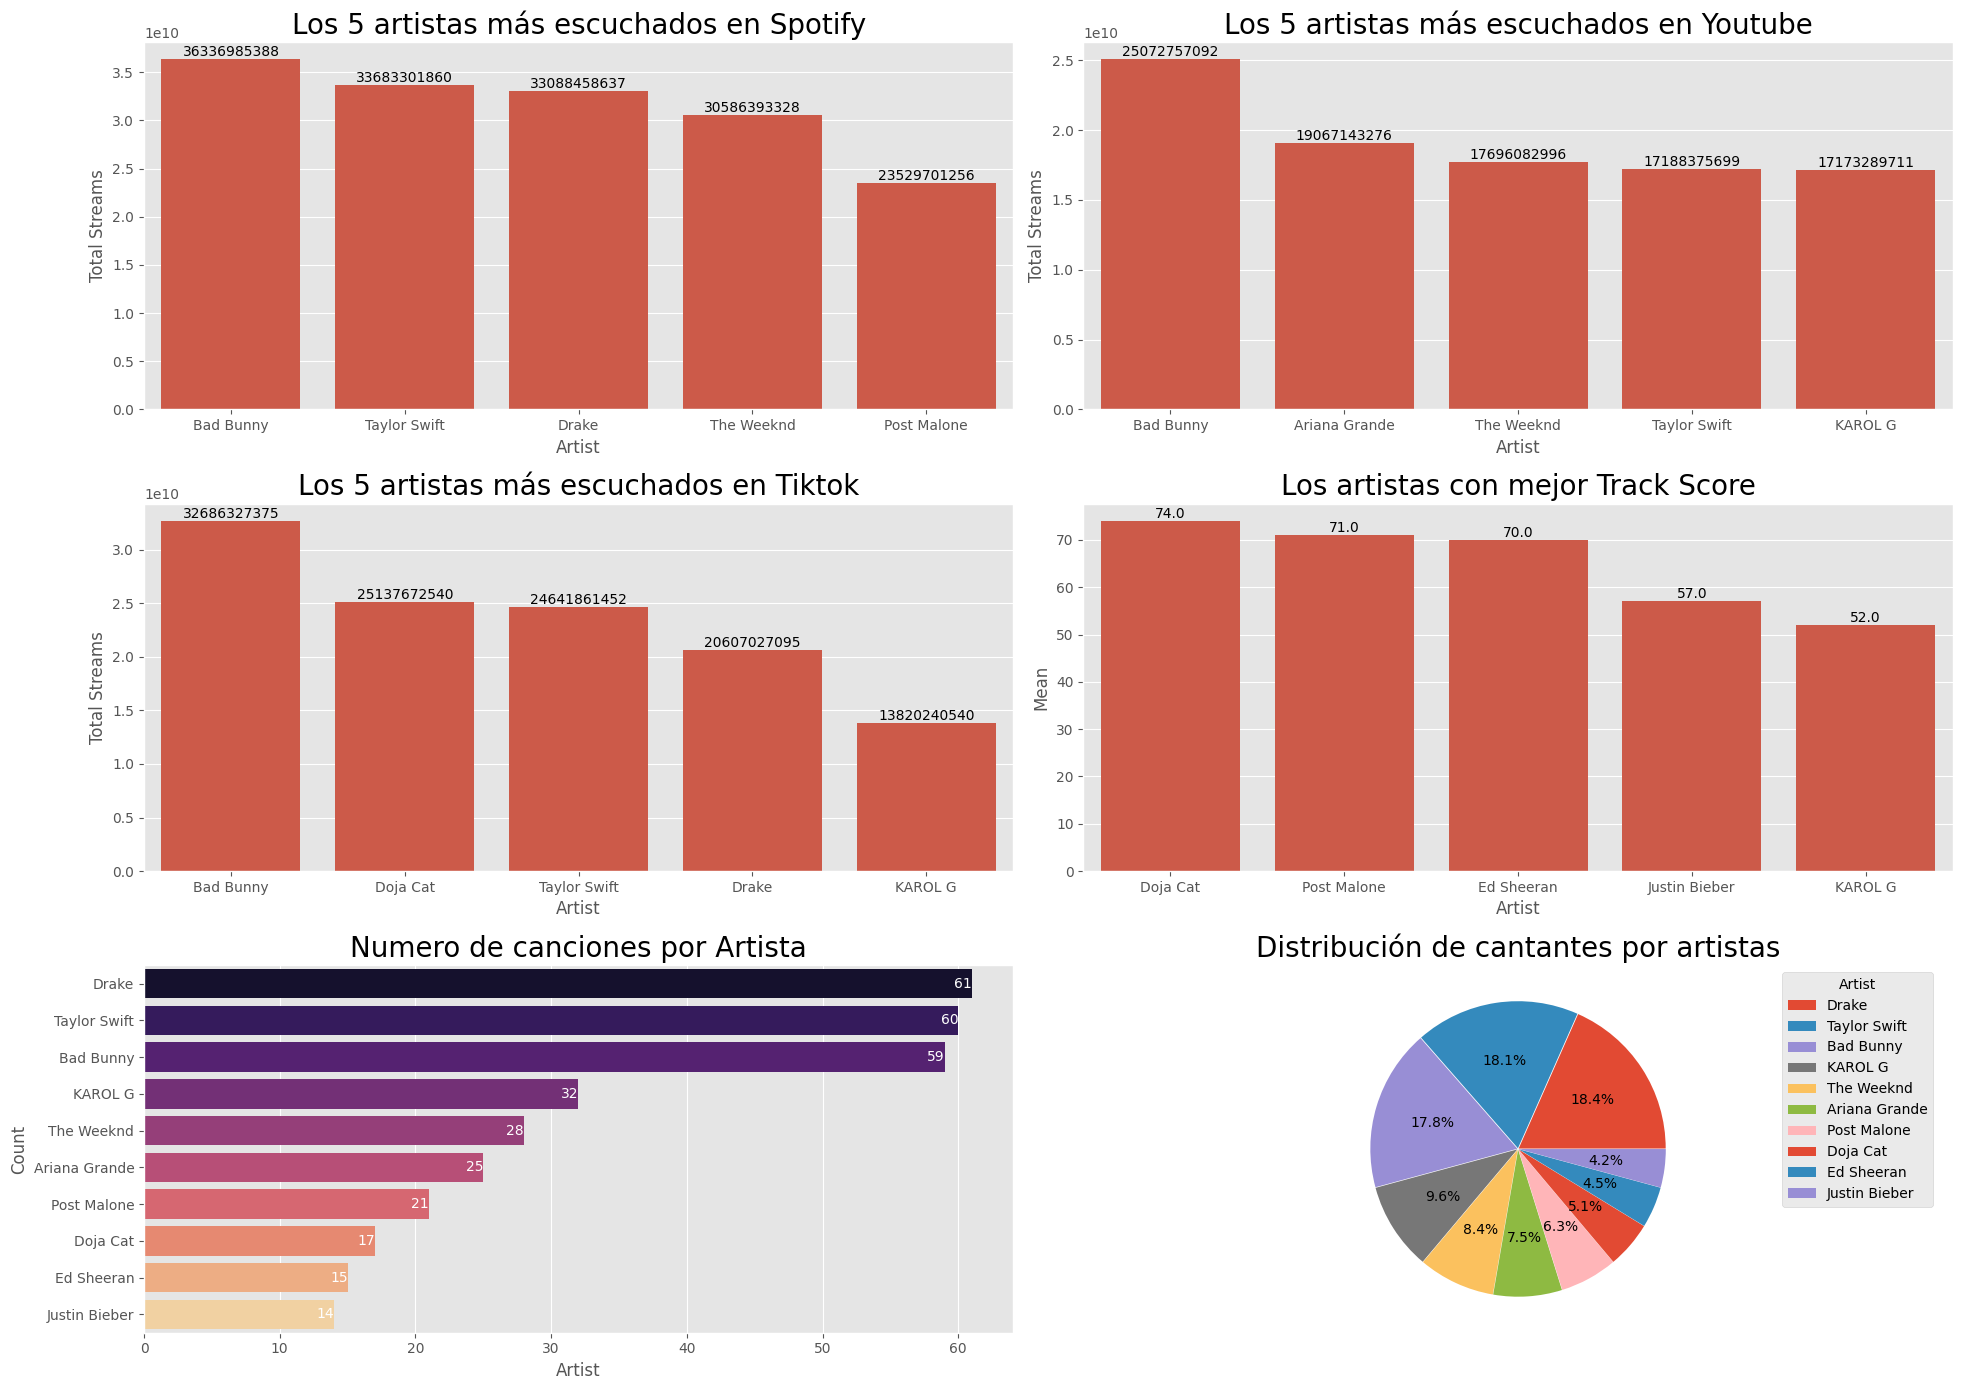

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,14), nrows=3, ncols=2)
data1= Artist_Streams.sort_values(by='Spotify Streams', ascending=False).head(5)
sns.barplot(x='Artist', y='Spotify Streams', data=data1,ax=ax[0,0])
ax[0,0].set_xlabel('Artist')
ax[0,0].set_ylabel('Total Streams')
ax[0,0].set_title('Los 5 artistas más escuchados en Spotify', fontsize= 20)

for index, value in enumerate(data1['Spotify Streams']):
    ax[0,0].text(index, value, f'{value}', ha = 'center', va = 'bottom')

data1= Artist_Streams.sort_values(by='YouTube Views', ascending=False).head(5)
sns.barplot(x='Artist', y='YouTube Views', data=data1,ax=ax[0,1])
ax[0,1].set_xlabel('Artist')
ax[0,1].set_ylabel('Total Streams')
ax[0,1].set_title('Los 5 artistas más escuchados en Youtube', fontsize= 20)
for index, value in enumerate(data1['YouTube Views']):
    ax[0,1].text(index, value, f'{value}', ha = 'center', va = 'bottom')

data1= Artist_Streams.sort_values(by='TikTok Views', ascending=False).head(5)
sns.barplot(x='Artist', y='TikTok Views', data=data1,ax=ax[1,0])
ax[1,0].set_xlabel('Artist')
ax[1,0].set_ylabel('Total Streams')
ax[1,0].set_title('Los 5 artistas más escuchados en Tiktok', fontsize= 20)
for index, value in enumerate(data1['TikTok Views']):
    ax[1,0].text(index,value,f'{value}',ha='center',va='bottom')

Artist_Streams['Track Score'] = Artist_Streams['Track Score'].round()
data1 = Artist_Streams.sort_values(by='Track Score',ascending=False).head(5)
sns.barplot(x='Artist', y='Track Score', data=data1,ax=ax[1,1])
ax[1,1].set_xlabel('Artist')
ax[1,1].set_ylabel('Mean')
ax[1,1].set_title('Los artistas con mejor Track Score', fontsize = 20)

for index, value in enumerate(data1['Track Score']): 
    ax[1,1].text(index, value, f'{value}', ha='center', va='bottom')

sns.barplot(x='count', y='Artist', data=Artist_track_count,ax=ax[2,0],palette='magma')
ax[2,0].set_xlabel('Artist')
ax[2,0].set_ylabel('Count')
ax[2,0].set_title('Numero de canciones por Artista', fontsize=20)

for index, value in enumerate(Artist_track_count['count']): 
    ax[2,0].text(value, index, f'{value}', ha='right',va='center',color='white')

ax[2,1].pie(Artist_track_count['count'], explode = [0.005]*len(Artist_track_count['count']), autopct='%1.1f%%')
plt.legend(Artist_track_count['Artist'], title = 'Artist', bbox_to_anchor=(1.2,1))
ax[2,1].set_title('Distribución de cantantes por artistas', fontsize = 20)

plt.tight_layout()
plt.show()

-Bad Bunny es el artista más escuchado en Spotify.  

-Bad Bunny es el artista más escuchado en Youtube. 

-Bad Bunny es el artista más escuchado en Tiktok. 

-Doja Cat es la artista con mejor Track Score. 

-Drake es el artista con el mayor numero de canciones. 

# Recopilar la cantidad de Streams por año

In [24]:
year_streams = data.groupby('year', as_index=False)[['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Total_streams']].agg(sum)
year_streams =year_streams.loc[year_streams['year'] >= 2010]
year_streams =year_streams.loc[year_streams['year'] < 2024]
year_streams


C:\Users\DELL\AppData\Local\Temp\ipykernel_6900\3001548323.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  year_streams = data.groupby('year', as_index=False)[['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Total_streams']].agg(sum)


,year,Spotify Streams,YouTube Views,TikTok Views,Total_streams
15,2010,26123996288,31206881150,16153133388,73484010826
16,2011,53885616767,51698649289,30914772642,136499038698
17,2012,56909799248,46257774176,21967587876,125135161300
18,2013,54276882204,50244108770,40240203154,144761194128
19,2014,58779735274,64867503181,38553827668,162201066123
20,2015,101193278141,98572017674,54696662065,254461957880
21,2016,117987330424,127430558055,53665662738,299083551217
22,2017,181550395670,172245735741,104760398165,458556529576
23,2018,186730143659,172959106459,134291525182,493980775300
24,2019,192532437792,160998024235,192473145398,546003607425
